In [26]:
import pandas as pd
%matplotlib inline
import os, sys
import itertools
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix


warnings.filterwarnings("ignore")

In [24]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = np.array([iris.target_names[i] for i in iris.target])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
df_X = df[iris.feature_names] # keep X vars in a dataframe like object for later use 
X = X_df
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)



## Use classification pool function 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy score:  0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


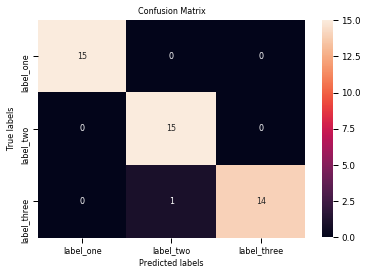

In [29]:

def fit_and_predict(X, y, classification_method):
    
   
    train_x_input, test_x_input, train_y_input, test_y_input = train_test_split(X, y, test_size=0.3, 
                                                                                random_state=1,stratify = y) 
    
        
    param_dict_for_xgb = {'colsample_bytree': 0.70,
    'gamma': 4.0504050666597102,
    'learning_rate': 0.01,
    'max_depth': 30,
    'min_child_weight': 2,
    'n_estimators': 180,
    'reg_alpha': 9.61,
    'subsample': 0.8}
    
    gbc_params = {
    'max_depth': [20, 30, 40],
    'min_samples_leaf': [3, 5, 7],
    'min_samples_split': [3, 10, 12],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [400, 1200, 1800]}
    

    
    classifier_pool = {"ada":  AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, class_weight='balanced')),
                  "ridge": RidgeClassifier(),
                   "gbc": GradientBoostingClassifier(**gbc_params),
                  "logistic": LogisticRegression(n_jobs = 100),
                  "xgb": XGBClassifier(**param_dict_for_xgb),
                  "cart": DecisionTreeClassifier(max_depth=10, class_weight='balanced'),
                  "lsvm": SVC(kernel="poly", degree=3, gamma='auto', C=0.025),
                  "nb": GaussianNB(),     
                  "rf": RandomForestClassifier( criterion='gini', n_jobs = -1, max_depth=30, max_features = 'sqrt',
                                               bootstrap = 'true', min_samples_leaf = 1, 
                                               n_estimators=1800, min_samples_split = 10, random_state= 2017),
                  "knn": KNeighborsClassifier(n_jobs = 50)
                  }


    estimator = [ ("imputer",  SimpleImputer(missing_values=np.nan, strategy='mean')),
                  ('standardscaler', StandardScaler(with_mean=True, with_std=True)),
                 # if you want to use PCA uncomment this bit of code - note if selecting 10 PCA components you will 
                 # need to adjust feature selection max_features =10 or corresponding number to PCA components.  
                 # you can turn off feature selection too as an option by commenting the feature_selection portion out
                 # ("reduce_dim", PCA(n_components = 10, random_state= 2017)),
                  ("feature_selection", SelectFromModel(RandomForestClassifier(random_state= 2017,
                                                                             n_jobs = -1, 
                                                                              n_estimators=800), 
                                                        threshold = 0.001, max_features=3)),
                  ("classification",classifier_pool[classification_method] )
                  ]

    pp = Pipeline(estimator)
    pp.fit(train_x_input, train_y_input)
    
    #predict_ = pp.predict_proba(test_x_input)[:,1]
    

    #Predict the response for test dataset
    y_pred = pp.predict(test_x_input)

    #print classification report 
    print(classification_report(test_y_input, y_pred))

    print("accuracy score: ", accuracy_score(test_y_input, y_pred))

    # show confusion matrix in the raw 
    print(confusion_matrix(test_y_input, y_pred))
    
    # plot confusion matrix
    
    cm = confusion_matrix(test_y_input, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})   
    ax.set_xlabel('Predicted labels', size=8);
    ax.set_ylabel('True labels',size=8); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['label_one', 'label_two', 'label_three'],size=8); # check labels to correspond with your data 
    ax.yaxis.set_ticklabels(['label_one', 'label_two', 'label_three'],size=8);
    






fit_and_predict(X, y, "rf")
          
          


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy score:  0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


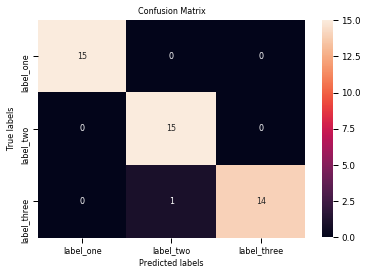

In [38]:
fit_and_predict(X, y, classification_method = "xgb")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy score:  0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


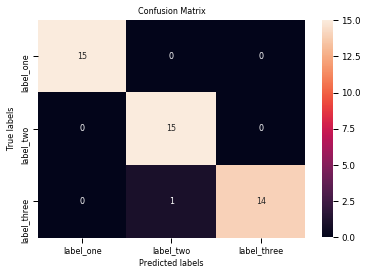

In [39]:

fit_and_predict(X, y, classification_method= "nb")

## simple approach to feature importance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Test accuracy score:  0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


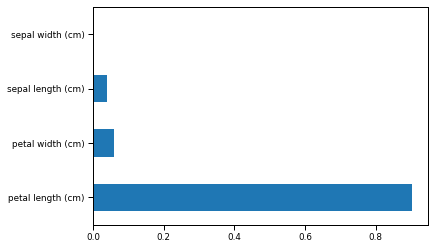

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(class_weight='balanced')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#print classification report 
print(classification_report(y_test, y_pred))

print("Test accuracy score: ", accuracy_score(y_test, y_pred))

# show confusion matrix in the raw 
print(confusion_matrix(y_test, y_pred))


feat_importances = pd.Series(clf.feature_importances_, index=df_X.columns) # dataframe X column names 
feat_importances.nlargest(10).plot(kind='barh')

## End Notebook 